In [11]:
# _*_coding:utf-8 _*_
from __future__ import print_function
from __future__ import division, print_function
from gurobipy import *
import re
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
from matplotlib.lines import lineStyles
import time
import networkx as nx

In [12]:

class Data():
    '''
    the format of solomon dataset
    '''

    def __init__(self):
        self.customerNum = 0  # the number of customers
        self.nodeNum = 0  # the sum of customers and depots
        self.vehicleNum = 0
        self.capacity = 0
        self.cor_X = []
        self.cor_Y = []
        self.demand = []
        self.readyTime = []
        self.dueTime = []
        self.serviceTime = []
        self.disMatrix = {}

    def read_data(self, path, customerNum, depotNum):
        '''
        function to read solomom data from .txt files, notice that it must be solomon dataset
        INPUT
            @ data  : class Data
            @ path  : Data path
            @ customerNum  : the number of customer
        OutPut : none
        '''
        self.customerNum = customerNum
        self.nodeNum = customerNum + depotNum
        f = open(path, 'r')
        lines = f.readlines()
        count = 0
        for line in lines:
            count = count + 1
            if (count == 5):
                line = line[:-1].strip()
                str = re.split(r" +", line)
                self.vehicleNum = int(str[0])
                self.capacity = float(str[1])
            elif (count >= 10 and count <= 10 + customerNum):
                line = line[:-1]
                str = re.split(r" +", line)
                self.cor_X.append(float(str[2]))
                self.cor_Y.append(float(str[3]))
                self.demand.append(float(str[4]))
                self.readyTime.append(float(str[5]))
                self.dueTime.append(float(str[6]))
                self.serviceTime.append(float(str[7]))

        # compute the distance matrix
        self.disMatrix = {}
        for i in range(0, self.nodeNum):
            dis_temp = {}
            for j in range(0, self.nodeNum):
                dis_temp[j] = int(math.hypot(self.cor_X[i] - self.cor_X[j], self.cor_Y[i] - self.cor_Y[j]))
            self.disMatrix[i] = dis_temp

    def plot_nodes(self):
        '''
        Description: function to plot
        '''
        Graph = nx.DiGraph()
        nodes_name = [str(x) for x in list(range(self.nodeNum))]
        Graph.add_nodes_from(nodes_name)
        cor_xy = np.array([self.cor_X, self.cor_Y]).T.astype(int)
        pos_location = {nodes_name[i]: x for i, x in enumerate(cor_xy)}
        nodes_color_dict = ['r'] + ['gray'] * (self.nodeNum - 1)

        nx.draw_networkx(Graph, pos_location, node_size=200, node_color=nodes_color_dict, labels=None,font_size =8)
        plt.show()

    def plot_route(self, route, color='k'):
        Graph = nx.DiGraph()
        nodes_name = [route[0]]
        cor_xy = [[self.cor_X[route[0]], self.cor_Y[route[0]]]]
        edge = []
        edges = [[route[0],route[1]]]
        for i in route[1:]:
            nodes_name.append(i)
            cor_xy.append([self.cor_X[i], self.cor_Y[i]])
            edge.append(i)
            if len(edge) == 2:
                edges.append(copy.deepcopy(edge))
                edge.pop(0)

        Graph.add_nodes_from(nodes_name)
        Graph.add_edges_from(edges)

        pos_location = {nodes_name[i]: x for i, x in enumerate(cor_xy)}
        nodes_color_dict = ['r'] + ['gray'] * (len(route)-2)+['r']

        nx.draw_networkx(Graph, pos_location, node_size=180, node_color=nodes_color_dict, edge_color=color, labels=None,font_size =8)
        plt.show()


# function to read data from .txt files
def readData(path, nodeNum):
    nodeNum = nodeNum;
    cor_X = []
    cor_Y = []

    f = open(path, 'r');
    lines = f.readlines();
    count = 0;
    # read the info
    for line in lines:
        count = count + 1;
        if (count >= 10 and count <= 10 + nodeNum):
            line = line[:-1]
            str = re.split(r" +", line)
            cor_X.append(float(str[2]))
            cor_Y.append(float(str[3]))

    # compute the distance matrix
    disMatrix = [([0] * nodeNum) for p in range(nodeNum)];
    for i in range(0, nodeNum):
        for j in range(0, nodeNum):
            temp = (cor_X[i] - cor_X[j]) ** 2 + (cor_Y[i] - cor_Y[j]) ** 2
            disMatrix[i][j] = (int)(math.sqrt(temp))
            temp = 0

    return disMatrix


def printData(disMatrix):
    print("-------cost matrix-------\n");
    for i in range(len(disMatrix)):
        for j in range(len(disMatrix)):
            # print("%d   %d" % (i, j));
            print("%6.1f" % (disMatrix[i][j]), end=" ");
        #             print(disMatrix[i][j], end = " ");
        print()





def Dijkstra(Graph, org, des):
        Q = list(Graph.nodes())
        for node in Q:
            if (node == org):
                Graph.nodes[node]['min_dis'] = 0
            else:
                Graph.nodes[node]['min_dis'] = np.inf
        current_node = org
        while (len(Q) > 0):
            min_dis = np.inf
            for node in Q:
                if (Graph.nodes[node]['min_dis'] < min_dis):
                    current_node = node
                    min_dis = Graph.nodes[node]['min_dis']#找最小的距离的点
            if (current_node != None):
                Q.remove(current_node)
            for child in Graph.successors(current_node):
                arc = (current_node, child)
                dis_temp = Graph.nodes[current_node]['min_dis'] + Graph.edges[arc]['length']
                if (dis_temp < Graph.nodes[child]['min_dis']):
                    Graph.nodes[child]['min_dis'] = dis_temp
                    Graph.nodes[child]['previous_node'] = current_node
        min_dis = Graph.nodes[des]['min_dis']
        current_node =des
        shortest_path = [current_node]
        while (current_node != org):
                current_node = Graph.nodes[current_node]['previous_node']
                shortest_path.insert(0, current_node)
        return  shortest_path, min_dis

[418, 560, 234, 114, 338, 991, 257, 966, 113]
145


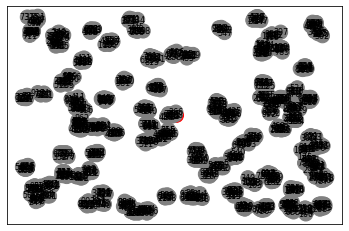

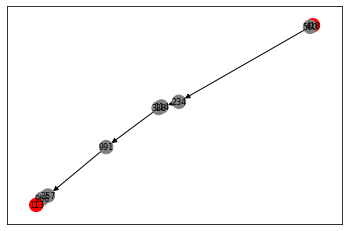

In [21]:
starttime = time.time()


if __name__ == "__main__":

    data = Data()
    path1 = './homberger_1000_customer_instances/C1_10_10.txt'
    data.read_data(path=path1, customerNum=1000, depotNum=1)  # change the path

    nodeNum =1000
    cost = readData(path1, nodeNum)
    Nodes=[]
    Arcs ={}
    for i in range(nodeNum):
        Nodes.append(i)

    for j in range(nodeNum):
         for i in range(nodeNum):
             if i != j:
               Arcs[i, j] = cost[i][j]

    Graph = nx.DiGraph()
    for node in Nodes:
        Graph.add_node(node, min_dis=0, previous_node=None)
    for key in Arcs.keys():
        Graph.add_edge(key[0], key[1], length=Arcs[key])
    org = 418
    des = 113

    shortest_path,min_dis=Dijkstra(Graph, org, des)
    print(shortest_path)
    print(min_dis)
    data.plot_nodes()
    data.plot_route(shortest_path)